<a href="https://colab.research.google.com/github/alibekk93/IDP_analysis/blob/main/IDP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intrinsically disordered proteins in thermophilic bacteria

In this notebook we go through IDR prediction of various protein datasets and compare the IDR content of these datasets

## Setup

[Biopython](https://biopython.org/) package is used to read .fasta files and work with sequences. Other packages are used to process the data, connect with API services to predict IDR, download results, etc.

In [ ]:
# installation of Biopython
!pip install BIO

In [ ]:
# Biopython
from Bio import SeqIO

# connecting with API
import urllib.request
import json

# files uploading / dowmloading
from google.colab import files
import pickle

# other packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm

## Functions

In [ ]:
def read_fasta(fasta_file):
  """
  
  """
  handle = open(fasta_file, 'r')
  seq_list = list(SeqIO.parse(handle, 'fasta'))
  handle.close()

  ids = [seq_record.id.split('|')[1] for seq_record in seq_list]
  seqs = [str(seq_record.seq) for seq_record in seq_list]
  lens = [len(seq) for seq in seqs]
  df = pd.DataFrame({'ID':ids, 'Sequence':seqs, 'Length':lens})

  return df

In [ ]:
EC_proteome = read_fasta('/content/EscherichiaColiK12_allProteins.fasta')
TT_proteome = read_fasta('/content/ThermusThermophilusHB8_allProteins.fasta')

EC_proteome = EC_proteome[EC_proteome.Length > 19]
TT_proteome = TT_proteome[TT_proteome.Length > 19]

In [ ]:
def calculate_iupred(proteinID_list, score_only=True):
  iupredURL_list = ['http://iupred3.elte.hu/iupred3/' + proteinID + '.json' for proteinID in proteinID_list]
  print('Retrieving disorder values from server...')
  protein_files = [urllib.request.urlretrieve(iupredURL, proteinID  + '.json')             for iupredURL, proteinID in zip(tqdm(iupredURL_list), proteinID_list)]
  proteins = []

  print('Unpacking json files...')
  for proteinID in tqdm(proteinID_list):
    with open('/content/{}.json'.format(proteinID), 'r') as f:
      d = json.load(f)
      if score_only == True:
        d = d['iupred2']
      proteins.append(d)
  
  return proteins

In [ ]:
TT_disorder_Iupred3 = calculate_iupred(TT_proteome.ID)

In [ ]:
EC_disorder_Iupred3_1 = calculate_iupred(EC_proteome.ID[:2700])

In [ ]:
EC_disorder_Iupred3_2 = calculate_iupred(EC_proteome.ID[2700:3882])

In [ ]:
EC_disorder_Iupred3_3 = calculate_iupred(EC_proteome.ID[3882:])

In [ ]:
with open('TT_proteome.pkl', 'wb') as f:
  pickle.dump(TT_disorder_Iupred3, f)
files.download('TT_proteome.pkl')

with open('EC_proteome_1.pkl', 'wb') as f:
  pickle.dump(EC_disorder_Iupred3_1, f)
files.download('EC_proteome_1.pkl')

with open('EC_proteome_2.pkl', 'wb') as f:
  pickle.dump(EC_disorder_Iupred3_2, f)
files.download('EC_proteome_2.pkl')

with open('EC_proteome_3.pkl', 'wb') as f:
  pickle.dump(EC_disorder_Iupred3_3, f)
files.download('EC_proteome_3.pkl')

In [ ]:
!ls -all '/content/.ipynb_checkpoints'

total 140
drwxr-xr-x 2 root root   4096 May 11 01:26 .
drwxr-xr-x 1 root root 135168 May 11 01:26 ..


In [ ]:
!zip -r /content/ipynb_checkpoints.zip /content/.ipynb_checkpoints

  adding: content/.ipynb_checkpoints/ (stored 0%)


In [ ]:
files.download('ipunb_checkpoints.zip')

FileNotFoundError: ignored

In [ ]:
proteinID_list = ['P0AG63', 'P0DOY9']

iupredURL_list = ['http://iupred3.elte.hu/iupred3/' + proteinID + '.json' for proteinID in proteinID_list]

protein_files = [urllib.request.urlretrieve(iupredURL, proteinID  + '.json') \
            for iupredURL, proteinID in zip(iupredURL_list, proteinID_list)]

proteins = []

for proteinID in proteinID_list:
  with open('/content/{}.json'.format(proteinID), 'r') as f:
    d = json.load(f)
    proteins.append(d)

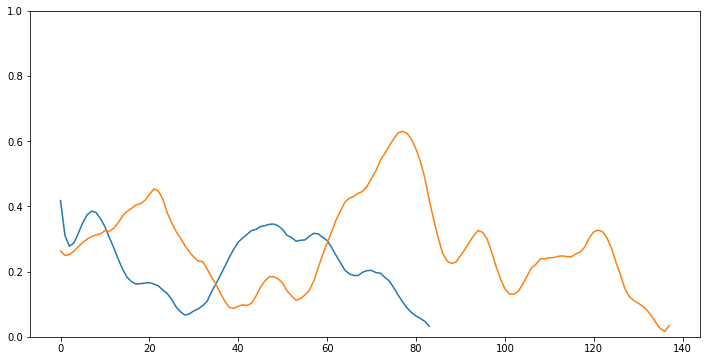

In [ ]:
plt.subplots(figsize=(12,6))
plt.ylim(0, 1)
for p in proteins:
  plt.plot(p['iupred2'])

In [ ]:
proteins[1]['sequence']

'MISLIAALAVDRVIGMENAMPWNLPADLAWFKRNTLNKPVIMGRHTWESIGRPLPGRKNIILSSQPGTDDRVTWVKSVDEAIAACGDVPEIMVIGGGRVYEQFLPKAQKLYLTHIDAEVEGDTHFPDYEPDDWESVFSEFHDADAQNSHSYCFEILERR'